<a href="https://colab.research.google.com/github/ukeshbhaal/Guvi--Task-7-ML/blob/main/Copy_of_KNN_Assignment-13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Encoding - Gender
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Gender']
# We can also Encode labels of multiple columns at once like - cols=['Gender','etc'] like that- but here
data[cols] = data[cols].apply(le.fit_transform)
data=data.drop(['User ID'], axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
x = data[["Gender", "Age","EstimatedSalary"]].values
y = data['Purchased'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([   ('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)
print("\n X_train\n",x_train,"\n X_test\n",x_test)
print("\n Y_train\n",y_train,"\n Y_test\n",y_test)

**Fitting K-NN to the Training set**

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

**Predicting the Test set results**

In [ ]:
y_pred_5 = knn5.predict(x_test)
y_pred_1 = knn1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
a_s_5=accuracy_score(y_test, y_pred_5)*100
a_s_1=accuracy_score(y_test, y_pred_1)*100
print("Accuracy with k=5", (a_s_5)*100)
print("Accuracy with k=1", (a_s_1)*100)

Accuracy with k=5 9200.0
Accuracy with k=1 9300.0


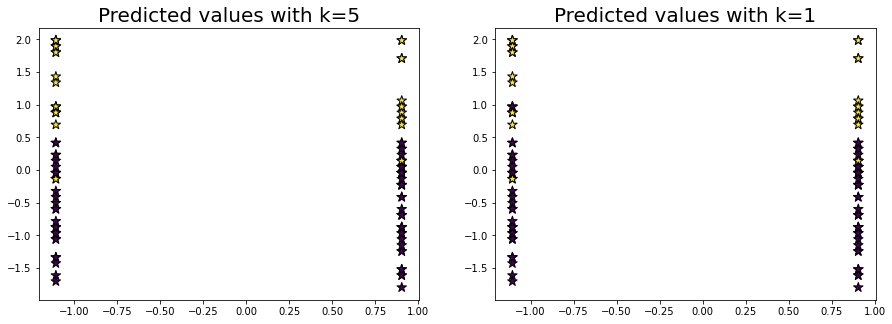

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

**Making the Confusion Matrix**

[[64  5]
 [ 2 29]]


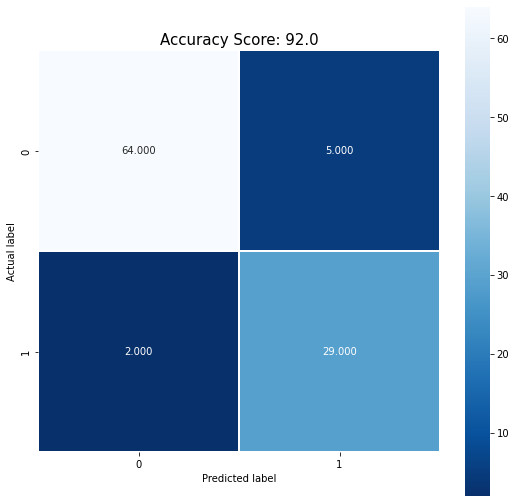

In [ ]:
from sklearn import metrics
cm_5 = metrics.confusion_matrix(y_test, y_pred_1)
print(cm_5)
plt.figure(figsize=(9,9))
sns.heatmap(cm_5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(a_s_5)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn import metrics
cm_1 = metrics.confusion_matrix(y_test, y_pred_1)
print(cm_1)

[[64  5]
 [ 2 29]]


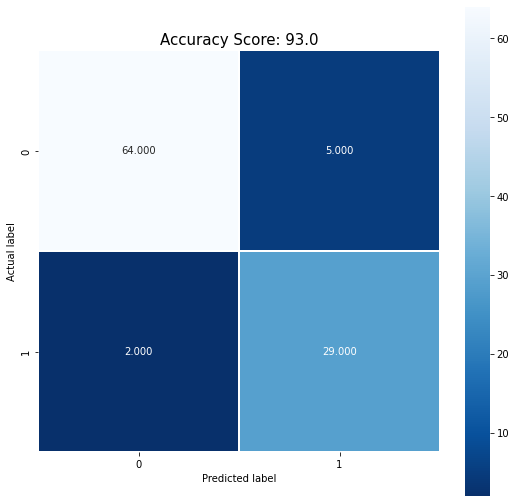

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(a_s_1)
plt.title(all_sample_title, size = 15);